<a href="https://colab.research.google.com/github/woodzim/posstest2_datmin_indra/blob/main/2109116074_Indra_Maulana_Posstest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [7]:
import pandas as pd

# membaca dataset dari file csv
df = pd.read_csv('https://raw.githubusercontent.com/woodzim/posstest2_datmin_indra/main/market_basket.csv')

df


,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sum()

In [ ]:
# 2 Item set
from itertools import permutations
# 
# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

In [ ]:
# Filter yang ada isinya aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

In [ ]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

In [ ]:
len(df)

19

In [ ]:
# List support
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")
  

In [ ]:
# List Confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

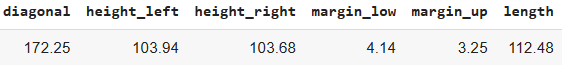
<!-- 1412 -->

In [8]:
import pandas as pd

# membaca dataset dari file csv
dff = pd.read_csv('https://raw.githubusercontent.com/woodzim/posstest2_datmin_indra/main/deteksi_uang_palsu.csv')

dff

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


### 1. Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [ ]:
import numpy as np

# membuat dataframe dari data baru
data = pd.DataFrame({'diagonal'    : [172.25],
                      'height_left' : [103.94],
                      'height_right': [103.68],
                      'margin_low'  : [4.14],
                      'margin_up'   : [3.25],
                      'length'      : [112.48]})

# Menentukan jarak antara setiap baris di dalam dataframe utama dengan dataframe data baru.
jaraknya = []
for i in range(len(dff)):
    row = dff.iloc[i]
    jarak = np.sqrt((row['diagonal'] - data['diagonal']) ** 2 +
                       (row['height_left'] - data['height_left']) ** 2 +
                       (row['height_right'] - data['height_right']) ** 2 +
                       (row['margin_low'] - data['margin_low']) ** 2 +
                       (row['margin_up'] - data['margin_up']) ** 2 +
                       (row['length'] - data['length']) ** 2)
    jaraknya.append(jarak)

# Membuat suatu kolom baru bernama "jarak" pada dataframe utama.
dff['jarak'] = jaraknya

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(dff['jarak'])

Tabel Jarak : 
0    0    0.671267
dtype: float64
1    0    1.458321
dtype: float64
2    0    0.834626
dtype: float64
3    0    0.910934
dtype: float64
4    0    1.312593
dtype: float64
5    0    2.421281
dtype: float64
6    0    1.741896
dtype: float64
7    0    1.113463
dtype: float64
8    0    1.722034
dtype: float64
9    0    1.738217
dtype: float64
Name: jarak, dtype: object


In [ ]:
# Cara agar seluruh kolom pada baris yang sesuai dapat ditampilkan dalam pandas 
# adalah dengan mengatur konfigurasi pandas.
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

dff

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0 0.671267 dtype: float64
1,True,171.66,103.68,103.41,4.35,3.33,113.74,0 1.458321 dtype: float64
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0 0.834626 dtype: float64
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0 0.910934 dtype: float64
4,True,171.79,104.57,104.04,4.26,3.15,113.46,0 1.312593 dtype: float64
5,False,172.00,104.23,104.52,5.76,3.37,110.94,0 2.421281 dtype: float64
6,False,171.56,104.03,103.93,5.47,3.50,111.67,0 1.741896 dtype: float64
7,False,171.90,104.33,104.40,4.70,3.31,112.12,0 1.113463 dtype: float64
8,False,171.84,104.06,104.10,4.87,3.25,111.04,0 1.722034 dtype: float64
9,False,172.11,104.14,104.15,4.84,3.28,110.98,0 1.738217 dtype: float64


### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [ ]:
# Membuat perhitungan jarak antara setiap baris dari dataframe utama dan dataframe data baru.
dff['jarak'] = np.sqrt(
    (dff['diagonal'] - 172.25)**2
    + (dff['height_left'] - 103.94)**2
    + (dff['height_right'] - 103.68)**2
    + (dff['margin_low'] - 4.14)**2
    + (dff['margin_up'] - 3.25)**2
    + (dff['length'] - 112.48)**2
)

# Melakukan penyusunan data mulai dari yang terkecil hingga yang terbesar 
# dan menemukan nilai yang paling dekat dengan data yang diberikan.
k = int(np.sqrt(len(dff)))
data_paling_dekat = dff.sort_values('jarak').head(k)

# Menampilkan data terdekat
print(data_paling_dekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length     jarak
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


### 3. Menentukan hasil prediksi berdasarkan label terbanyak

In [ ]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = dff.drop(columns=['is_genuine','jarak'],axis=1)
y_train = dff['is_genuine']

# inisiasi data baru menjadi data tes
testing = data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(testing)

print("Dari respons nomor 2, dapat disimpulkan bahwa prediksinya adalah : True ")
print("Hasil dari penerapan Algoritma KNN dengan menggunakan library sklearn untuk melakukan prediksi adalah : "+ ' '.join(map(str, prediksi)))

Dari respons nomor 2, dapat disimpulkan bahwa prediksinya adalah : True 
Hasil dari penerapan Algoritma KNN dengan menggunakan library sklearn untuk melakukan prediksi adalah : True


# (3) Analisis

> Nama : Indra Maulana

> Nim : 2109116074


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# ANALISIS Indonesia College Entrance Examination - UTBK 2019

## 1. Business Understanding

*   Tujuan:  adalah untuk memahami konteks dan karakteristik data yang terkait dengan ujian masuk perguruan tinggi di Indonesia. Dengan memahami hal ini, kita dapat mengevaluasi dan menganalisis data dengan lebih akurat dan dapat mengambil keputusan yang lebih baik dalam pengembangan strategi dan kebijakan pendidikan yang berhubungan dengan perguruan tinggi di Indonesia. Selain itu, dengan mengetahui jurusan yang dipilih oleh peserta ujian, kita dapat mengevaluasi kebutuhan pasar tenaga kerja dan mengembangkan program pendidikan yang lebih efektif dalam memenuhi kebutuhan tersebut.

## 2. Data Understanding

* Unnamed: 0 : Kolom baris, format integer.
* id_major : Kolom ini berisi id dari setiap jurusan dalam format integer
* id_university : Kolom ini berisi id dari setiap universitas dalam format integer
* type : Kolom ini berisi nama fakultas nya dalam format object
* major_name : Kolom ini berisi nama jurusan dalam object
capacity : Kolom ini berisi jumlah kapasitas dalam setiap jurusan dalam format integer

Ada 2 jenis data dalam dataset ini, yaitu object dan integer. Terdapat juga 3167 nilai pada setiap kolom. artinya tidak ada missing value pada kolom ini.

In [9]:
import pandas as pd
df3 = pd.read_csv('https://raw.githubusercontent.com/woodzim/posstest2_datmin_indra/main/majors.csv')

df3

,Unnamed: 0,id_major,id_university,type,major_name,capacity
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1,1111022,111,science,TEKNIK SIPIL,64
2,2,1111037,111,science,TEKNIK MESIN,48
3,3,1111045,111,science,TEKNIK KIMIA,48
4,4,1111053,111,science,ARSITEKTUR,48
...,...,...,...,...,...,...
3162,3162,9212011,921,humanities,EKONOMI PEMBANGUNAN,32
3163,3163,9212042,921,humanities,MANAJEMEN,32
3164,3164,9212057,921,humanities,AKUNTANSI,32
3165,3165,9212065,921,humanities,PENDIDIKAN BAHASA INDONESIA,16


Penjelasan Setiap Kolom 

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3167 non-null   int64 
 1   id_major       3167 non-null   int64 
 2   id_university  3167 non-null   int64 
 3   type           3167 non-null   object
 4   major_name     3167 non-null   object
 5   capacity       3167 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 148.6+ KB


## 3. DATA PREPARATION

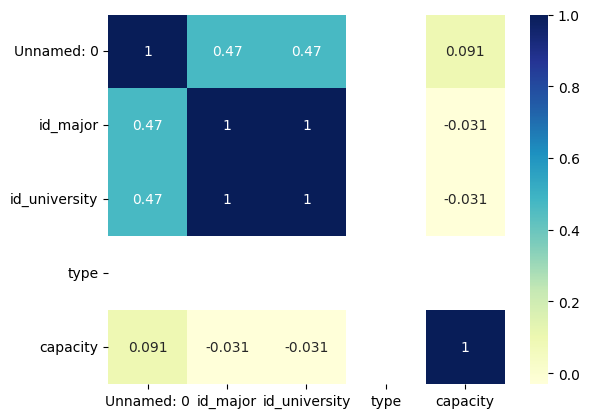

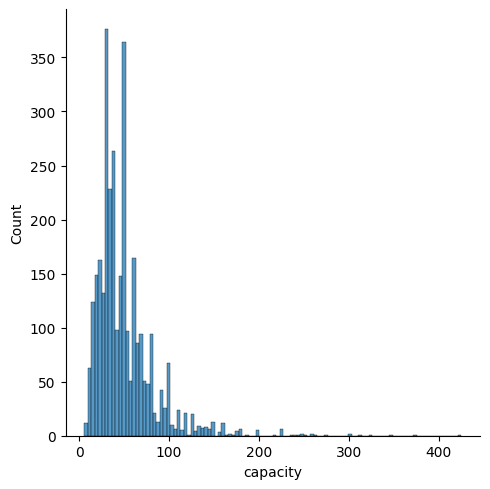

capacity         1.000000
Unnamed: 0       0.090523
id_major        -0.030513
id_university   -0.030526
type                  NaN
Name: capacity, dtype: float64

In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mengubah nilai-nilai kategorikal menjadi numerik
df3["type"] = df3["type"].map({"science": 1, "humanities": 0})

# Melakukan analisis korelasi antar variabel
corr = df3.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

# Melakukan analisis distribusi variabel
sns.displot(df3["capacity"], kde=False)
plt.show()

# Menentukan variabel yang paling berpengaruh terhadap tingkat adaptabilitas siswa
corr["capacity"].sort_values(ascending=False)

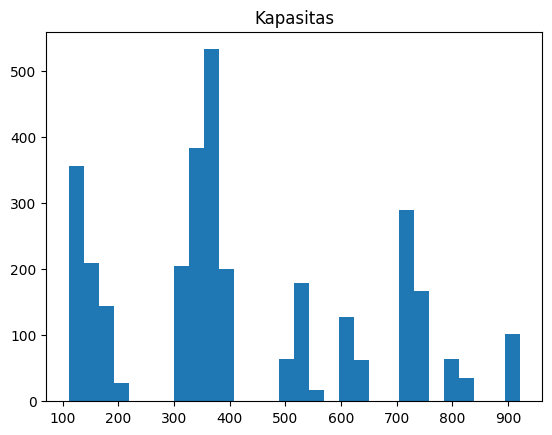

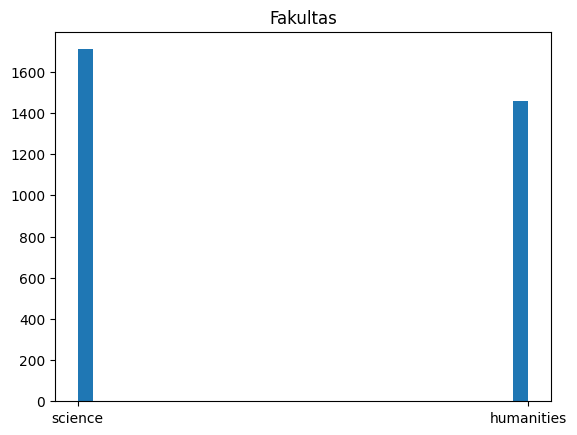

In [ ]:
# memilih kolom id_university dan type
cpct = df3['id_university']
typee = df3['type']

# membuat histogram untuk kolom id_university
plt.hist(cpct, bins=30)
plt.title("ID Universitas")
plt.show()

# membuat histogram untuk kolom type
plt.hist(typee, bins=30)
plt.title("Fakultas")
plt.show()



# Histogram pertama menunjukkan Jumlah Kapasitasnya , 
# sedangkan histogram kedua menunjukkan jumlah yang masuk pada tiap fakultas.


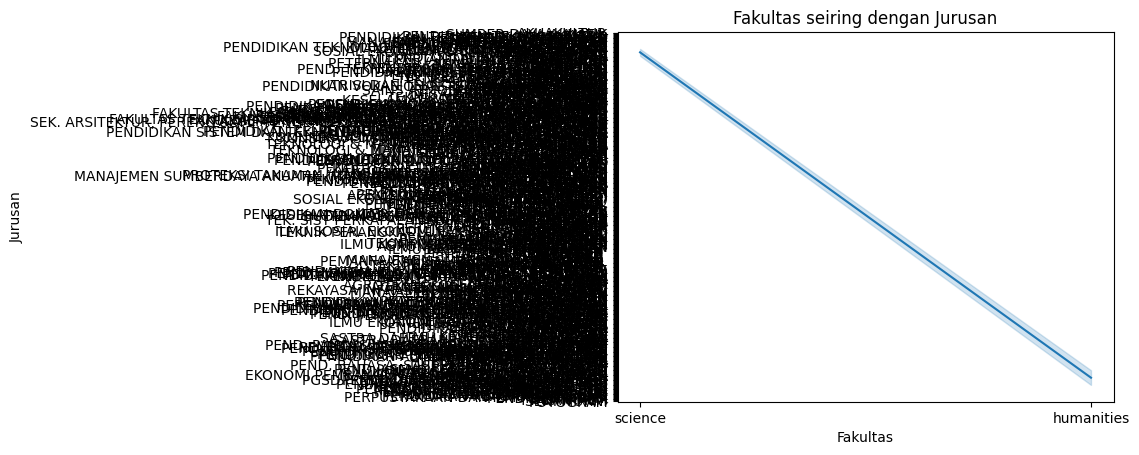

In [ ]:
import seaborn as sns

# memilih kolom major_nama dan type
typee = df3['type']
major_name = df3['major_name']

# membuat line plot
sns.lineplot(x=typee, y=major_name)
plt.title("Fakultas seiring dengan Jurusan")
plt.xlabel("Fakultas")
plt.ylabel("Jurusan")
plt.show()

In [ ]:
df3.isna().sum()

Unnamed: 0       0
id_major         0
id_university    0
type             0
major_name       0
capacity         0
dtype: int64